#Week 9: Day 4 – Graphs and Networks
# Understanding Graph and Neural Network

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display

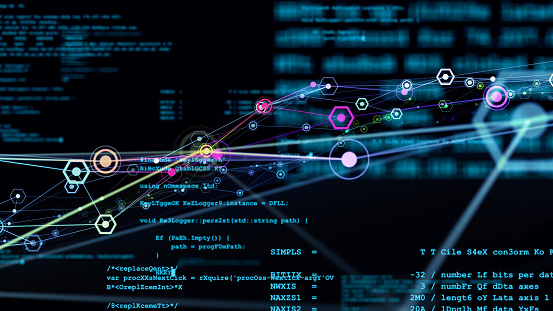

In [ ]:
im=Image.open('graphs.jpg')
display(im)
array=np.array

In [ ]:
# importing the libraries
import numpy as np
from PIL import Image
from IPython.display import display

In [ ]:
# torch is an open-source Python library for deep learning
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9314, 0.8532, 0.4399],
        [0.4165, 0.6747, 0.9869],
        [0.5587, 0.9673, 0.9658],
        [0.2079, 0.2288, 0.6166],
        [0.7915, 0.0353, 0.9776]])


In [ ]:
import rdkit
from torch_geometric.datasets import MoleculeNet

In [ ]:
# load the ESOL dataset
data=MoleculeNet(root=",", name="ESOL")
data

Processing...
Done!


ESOL(1128)

In [ ]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset fetures: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample nodes: ", data[0].num_nodes)
print("Sample edges: ", data[0].num_edges)


#edge_index = graph connection
#smiles = molecules with atoms
#x=node features (32 nodes have each 9 features)
#y=labels(dimmension)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset fetures:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], y=[1, 1], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ')
Sample nodes:  32
Sample edges:  68


In [ ]:
#Investigating the features
#Shape: [num_nodes, num_nodes_features]
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [ ]:
# Investigating the edges in  sparce COO format
# Shape [2, num_edges]
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [ ]:
data[0].y

tensor([[-0.7700]])

In [ ]:
# converting smiles to rdkits molecules
data[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

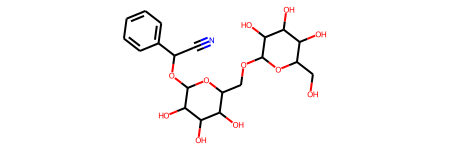

In [ ]:
# generating features
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule=Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [ ]:
# checking the type
type(molecule)

rdkit.Chem.rdchem.Mol

In [ ]:
# implimenting the chain
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size=64


class GCN(torch.nn.Module):
    def __init__(self):
        #Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)
        
        #GCN Layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)
    
        #Output layer
        self.out=Linear(embedding_size*2, data.num_classes)
    
    def forward(self, x, edge_index, batch_index):
        #First Conv layer
        hidden=self.initial_conv(x, edge_index)
        hidden=F.tanh(hidden)
        
        #other Conv layers
        hidden=self.conv1(hidden, edge_index)
        hidden=F.tanh(hidden)
        hidden=self.conv2(hidden, edge_index)
        hidden=F.tanh(hidden)
        hidden=self.conv3(hidden, edge_index)
        hidden=F.tanh(hidden)
        
        #Global Pooling Layer(Stack different aggregations)
        hidden=torch.cat([gmp(hidden, batch_index),
                          gap(hidden, batch_index)], dim=1)
        #Apply a final(linear) Classifier.
        out=self.out(hidden)
        
        return out, hidden
model=GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))    

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=734, bias=True)
)
Number of parameters:  107806


In [ ]:
# training the GNN
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

#Root mean squared error
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0007)

#Use GPU for training
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=model.to(device)

#wrap data in a data loader
data_size=len(data)
NUM_GRAPHS_PER_BATCH=64
loader=DataLoader(data[:int(data_size*0.8)],
                  batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader=DataLoader(data[int(data_size*0.8):],
                       batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
def train(data):
    # Enumerate over the data
    for batch in loader:
        #Use GPU
        batch.to(device)
        # Reset gradients
        optimizer.zero_grad()
        #Passing the mode features and the connection info
        pred, embedding=model(batch.x.float(), batch.edge_index, batch.batch)
        # Calculating the loss and gradients
        loss=torch.sqrt(loss_fn(pred, batch.y))
        loss.backward()
        #update using the gradients
        optimizer.step()
        return loss, embedding
    
print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch,{epoch} | Train loss {loss}")

Starting training...
Epoch,0 | Train loss 3.5230557918548584
Epoch,100 | Train loss 2.226785898208618
Epoch,200 | Train loss 1.9202908277511597
Epoch,300 | Train loss 2.1104037761688232
Epoch,400 | Train loss 1.9358536005020142
Epoch,500 | Train loss 1.329263687133789
Epoch,600 | Train loss 1.403931975364685
Epoch,700 | Train loss 1.2330924272537231
Epoch,800 | Train loss 1.1209644079208374
Epoch,900 | Train loss 1.0627559423446655
Epoch,1000 | Train loss 1.0928292274475098
Epoch,1100 | Train loss 1.0360934734344482
Epoch,1200 | Train loss 0.81746906042099
Epoch,1300 | Train loss 1.0294651985168457
Epoch,1400 | Train loss 1.0446511507034302
Epoch,1500 | Train loss 1.0899429321289062
Epoch,1600 | Train loss 0.968475878238678
Epoch,1700 | Train loss 1.0353447198867798
Epoch,1800 | Train loss 1.0033009052276611
Epoch,1900 | Train loss 1.0406378507614136


<AxesSubplot:>

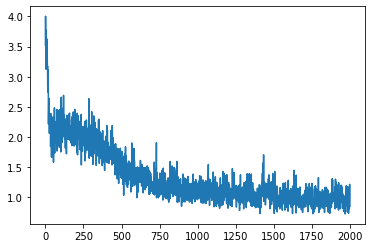

In [ ]:
#Visualize learning(training loss)
import seaborn as sns
losses_float=[float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices=[i for i,l in enumerate(losses_float)]
plt=sns.lineplot(loss_indices, losses_float)
plt

In [ ]:
import pandas as pd

In [ ]:
#Analyze the results for one batch and getting a test prediction
test_batch=next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed=model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df=pd.DataFrame()
    df["y_real"]=test_batch.y.tolist()
    df["y_pred"]=pred.tolist()
df["y_real"]=df["y_real"].apply(lambda row: row[0])
df["y_pred"]=df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,0.150,-0.819944
1,-0.900,-2.256692
2,-6.350,-3.873670
3,-2.461,-1.957397
4,-2.540,-3.208068
...,...,...
59,-4.660,-4.845648
60,-3.370,-3.577387
61,-5.410,-4.878239
62,-2.090,-2.984016


<AxesSubplot:xlabel='y_real', ylabel='y_pred'>

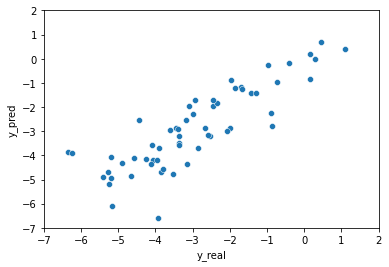

In [ ]:
# ploting a scatterplot of the perdiction
plt=sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7,2))
plt.set(ylim=(-7,2))
plt